In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
from sklearn import metrics
%matplotlib inline


In [2]:
df = pd.read_csv(r"C:/Users/plata/Desktop/netflow_day-02.csv", nrows=500)

In [30]:
print(df)

       TIME  DURATION            SrcDevice   DstDevice  Protocol    SrcPort  \
0    118781      5580           Comp364445  Comp547245        17  Port05507   
1    118783      6976           Comp450942  Comp829338         6  Port03137   
2    118785     14178             IP564116  Comp141988        17       5060   
3    118785     28147             IP564116  Comp141988        17       5060   
4    118785     48507             IP564116  Comp141988        17       5060   
5    118785     63173             IP564116  Comp141988        17       5060   
6    118785     78594             IP564116  Comp141988        17       5060   
7    118785     90763             IP564116  Comp141988        17       5060   
8    118785    104427             IP564116  Comp141988        17       5060   
9    118785    115677             IP564116  Comp141988        17       5060   
10   118785    135078             IP564116  Comp141988        17       5060   
11   118785    148289             IP564116  Comp1419

In [4]:
df.head()

,TIME,DURATION,SrcDevice,DstDevice,Protocol,SrcPort,DstPort,SrcPackets,DstPackets,SrcBytes,DstBytes
0,118781,5580,Comp364445,Comp547245,17,Port05507,Port46272,0,755065,0,1042329018
1,118783,6976,Comp450942,Comp829338,6,Port03137,445,1665,1108,300810,250408
2,118785,14178,IP564116,Comp141988,17,5060,5060,1866,0,1477041,0
3,118785,28147,IP564116,Comp141988,17,5060,5060,3326,0,2656305,0
4,118785,48507,IP564116,Comp141988,17,5060,5060,5423,0,4388449,0


In [5]:
X = df[['SrcPackets','DstPackets','SrcBytes','DstBytes']]

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X))

In [7]:
#Assining Column Names
X_normalized.columns = ['SrcPackets','DstPackets','SrcBytes','DstBytes']

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_normalized)
y_kmeans = kmeans.predict(X_normalized)

In [9]:
#Assigning cluster centers
centers = kmeans.cluster_centers_
print('Cluster centers of columns:\n')
print(pd.DataFrame(centers,columns= ['SrcPackets','DstPackets','SrcBytes','DstBytes']))

Cluster centers of columns:

   SrcPackets  DstPackets  SrcBytes  DstBytes
0    0.005119    0.001743  0.008336  0.005265
1    0.999883    0.999991  0.999874  0.999962


In [10]:
#1) Elbow Method: 

In [11]:
from sklearn import metrics
from scipy.spatial.distance import cdist

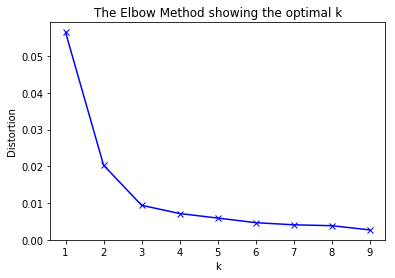

In [12]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_normalized)
    kmeanModel.fit(X_normalized)
    distortions.append(sum(np.min(cdist(X_normalized, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_normalized.shape[0])
 
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [13]:
#2) Average Silhouette Method:

In [14]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [15]:
cluster_range = range( 2, 10 )

for n_clusters in cluster_range:
  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict( X_normalized )

  silhouette_avg = silhouette_score(X_normalized, cluster_labels)
  print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)

  # Compute the silhouette scores for each sample
  sample_silhouette_values = silhouette_samples(X_normalized, cluster_labels)

For n_clusters = 2 The average silhouette_score is : 0.9854495827150986
For n_clusters = 3 The average silhouette_score is : 0.9583904358847489
For n_clusters = 4 The average silhouette_score is : 0.9569079168895182
For n_clusters = 5 The average silhouette_score is : 0.9454365395744844
For n_clusters = 6 The average silhouette_score is : 0.9237159391862906
For n_clusters = 7 The average silhouette_score is : 0.9269644731945211
For n_clusters = 8 The average silhouette_score is : 0.9275914801782458
For n_clusters = 9 The average silhouette_score is : 0.8802480609333997


In [16]:
#3 MeanShift

In [17]:
#Loading Min Max Scaling and Creating New Data Frame
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X))

In [18]:
X_normalized.columns = ['SrcPackets','DstPackets','SrcBytes','DstBytes']

In [19]:
from sklearn.cluster import MeanShift, estimate_bandwidth

ms = MeanShift(bin_seeding=True)
ms.fit(X_normalized)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 12


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = (16, 9)

# Creating a sample dataset with 4 clusters
X, y = make_blobs(n_samples=500, n_features=3, centers=3)

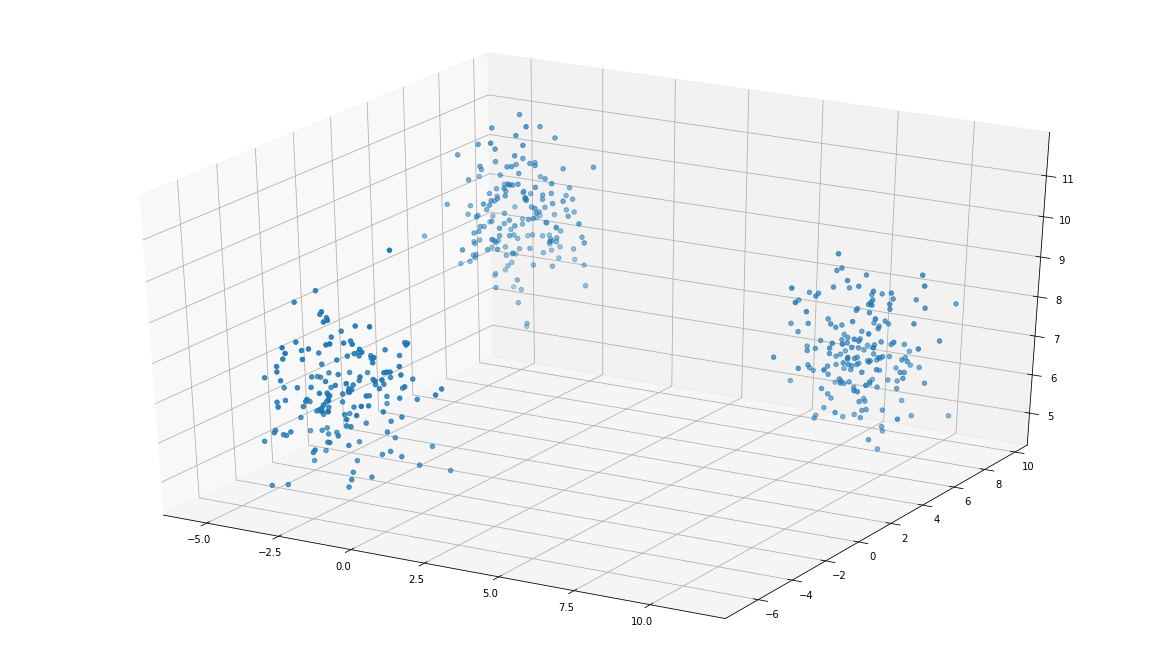

In [21]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

In [22]:
# Initializing KMeans
kmeans = KMeans(n_clusters=3)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

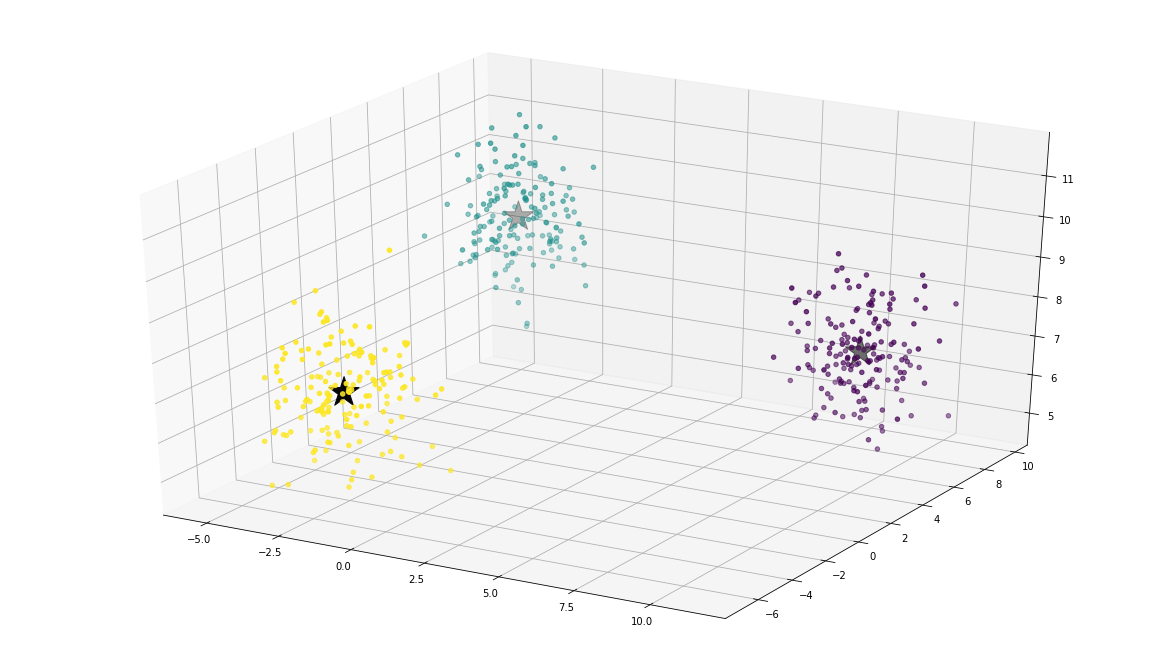

In [23]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)

In [5]:
#Loading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

In [6]:
#Gathering Data
df = pd.read_csv(r"C:/Users/plata/Desktop/netflow_day-02.csv",sep=",",index_col=False, nrows=500)

In [7]:
df.head()

,TIME,DURATION,SrcDevice,DstDevice,Protocol,SrcPort,DstPort,SrcPackets,DstPackets,SrcBytes,DstBytes
0,118781,5580,Comp364445,Comp547245,17,Port05507,Port46272,0,755065,0,1042329018
1,118783,6976,Comp450942,Comp829338,6,Port03137,445,1665,1108,300810,250408
2,118785,14178,IP564116,Comp141988,17,5060,5060,1866,0,1477041,0
3,118785,28147,IP564116,Comp141988,17,5060,5060,3326,0,2656305,0
4,118785,48507,IP564116,Comp141988,17,5060,5060,5423,0,4388449,0


In [8]:
#Selecting Numeric Fields To Be Used In Modelling
X = df[['SrcPackets','DstPackets','SrcBytes','DstBytes']]

In [9]:
#Loading Min Max Scaling and Creating New Data Frame
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X))

In [10]:
#Assining Column Names
X_normalized.columns = ['SrcPackets','DstPackets','SrcBytes','DstBytes']

In [11]:
#Implementing Algorithm
from sklearn.ensemble import IsolationForest
iforest = IsolationForest()
iforest.fit(X_normalized)

IsolationForest(bootstrap=False, contamination=0.1, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)

In [12]:
#Predicting Anomaly Class and Anomaly Score
Anomaly_Class = iforest.predict(X_normalized)
Anomaly_Score = iforest.decision_function(X_normalized)

In [13]:
#Creating New Columns Based on Anomaly Detection
X['Anomaly_Class'] = Anomaly_Class
X['Anomaly_Score'] = Anomaly_Score

In [14]:
#Viewing Class Counts
#-1 is anomaly, 1 is normal
X.groupby('Anomaly_Class')[['Anomaly_Score']].count()

,Anomaly_Score
Anomaly_Class,
-1,50
1,450


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016BA1A82780>,
      dtype=object)

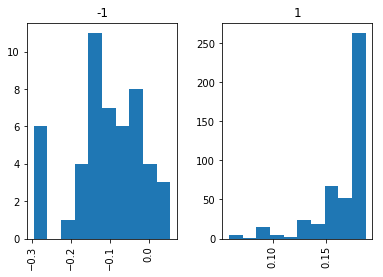

In [15]:
#Histogram of Anomaly Scores By Anomaly Class
X['Anomaly_Score'].hist(by=X['Anomaly_Class'])

In [16]:
#Descriptive Statistics
X['Anomaly_Score'].describe()

count    500.000000
mean       0.139609
std        0.090003
min       -0.295040
25%        0.153949
50%        0.176325
75%        0.182635
max        0.186609
Name: Anomaly_Score, dtype: float64

In [17]:
#Implementing Algorithm With Different Parameters
#contamination: Proportion of outliers in the data set
from sklearn.ensemble import IsolationForest
iforest = IsolationForest(contamination=0.2)
iforest.fit(X_normalized)

IsolationForest(bootstrap=False, contamination=0.2, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)

In [18]:
#Predicting Anomaly Class and Anomaly Score
Anomaly_Class = iforest.predict(X_normalized)
Anomaly_Score = iforest.decision_function(X_normalized)

In [19]:
#Creating New Columns Based on Anomaly Detection
X['Anomaly_Class_Contamination'] = Anomaly_Class
X['Anomaly_Score_Contamination'] = Anomaly_Score

In [20]:
#Viewing Class Counts
#-1 is anomaly, 1 is normal
X.groupby('Anomaly_Class_Contamination')[['Anomaly_Score_Contamination']].count()

,Anomaly_Score_Contamination
Anomaly_Class_Contamination,
-1,100
1,400


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016BA58ECE80>,
      dtype=object)

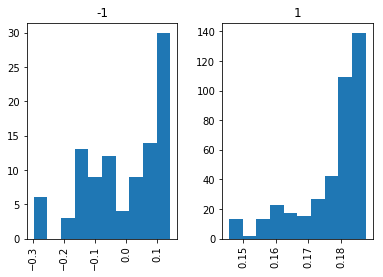

In [21]:
#Histogram of Anomaly Scores By Anomaly Class
X['Anomaly_Score_Contamination'].hist(by=X['Anomaly_Class_Contamination'])

In [22]:
#Descriptive Statistics
X['Anomaly_Score_Contamination'].describe()

count    500.000000
mean       0.141114
std        0.092624
min       -0.297195
25%        0.155595
50%        0.178963
75%        0.183786
max        0.187526
Name: Anomaly_Score_Contamination, dtype: float64

In [23]:
#Implementing Algorithm With Different Parameters
#bootstrap: If True, individual trees are fit on random subsets of the training data sampled with replacement.
from sklearn.ensemble import IsolationForest
iforest = IsolationForest(bootstrap=True)
iforest.fit(X_normalized)

IsolationForest(bootstrap=True, contamination=0.1, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)

In [24]:
#Predicting Anomaly Class and Anomaly Score
Anomaly_Class = iforest.predict(X_normalized)
Anomaly_Score = iforest.decision_function(X_normalized)

In [25]:
#Creating New Columns Based on Anomaly Detection
X['Anomaly_Class_Bootstrap'] = Anomaly_Class
X['Anomaly_Score_Bootstrap'] = Anomaly_Score

In [26]:
#Viewing Class Counts
#-1 is anomaly, 1 is normal
X.groupby('Anomaly_Class_Bootstrap')[['Anomaly_Score_Bootstrap']].count()

,Anomaly_Score_Bootstrap
Anomaly_Class_Bootstrap,
-1,50
1,450


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016BA5A75470>,
      dtype=object)

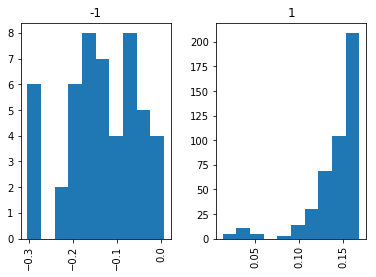

In [27]:
#Histogram of Anomaly Scores By Anomaly Class
X['Anomaly_Score_Bootstrap'].hist(by=X['Anomaly_Class_Bootstrap'])

In [28]:
#Original Data Set With New Variables
X.head()

,SrcPackets,DstPackets,SrcBytes,DstBytes,Anomaly_Class,Anomaly_Score,Anomaly_Class_Contamination,Anomaly_Score_Contamination,Anomaly_Class_Bootstrap,Anomaly_Score_Bootstrap
0,0,755065,0,1042329018,-1,0.033217,-1,0.010769,-1,-0.014247
1,1665,1108,300810,250408,1,0.182335,1,0.180789,1,0.160868
2,1866,0,1477041,0,1,0.183084,1,0.181483,1,0.164067
3,3326,0,2656305,0,1,0.182714,1,0.181483,1,0.161849
4,5423,0,4388449,0,1,0.180525,1,0.180412,1,0.158863


In [29]:
#Top 5 Anomaly Records
X[['Anomaly_Score_Contamination','Anomaly_Score_Bootstrap','Anomaly_Score']].head().sort_values(['Anomaly_Score_Contamination'], ascending=[1])

,Anomaly_Score_Contamination,Anomaly_Score_Bootstrap,Anomaly_Score
0,0.010769,-0.014247,0.033217
4,0.180412,0.158863,0.180525
1,0.180789,0.160868,0.182335
2,0.181483,0.164067,0.183084
3,0.181483,0.161849,0.182714
